In [230]:
import os
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt

In [7]:
baseloc = 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1'

In [38]:
#get csv-files
def file_name(file_dir):   
    L=[]
    for root, dirs, files in os.walk(file_dir):  
        for file in files:  
            if os.path.splitext(file)[1] == ".csv":
                L.append(os.path.join(root, file))
            else:
                continue 
                      
    return L  

csvfiles = file_name(baseloc+'\\Files_POS')
print(csvfiles)
#csvfiles = ["r"+ file for file in files]

['C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\Anderson_S01_P01_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\Anderson_S01_P02_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\Anderson_S01_P03_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\Anderson_S01_P04_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\grimm_20_1_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\grimm_20_2_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\grimm_23_1_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\grimm_23_2_normalized-annot.csv', 'C:\\Users\\rondin\\Desktop\\Projects\\Project 1\\Files_POS\\grimm_23_3_normalized-annot.csv']


In [34]:
name = list(os.path.split(csvfiles[4]))[1].split("_")
#name = name[1].split("_")
name
#name.split("_")
#int(name[2][-1])

['grimm', '20', '1', 'normalized-annot.csv']

In [42]:
df = pd.DataFrame()

for filename in csvfiles:
    #print(filename)
    csv = pd.read_csv(filename)
    # recode the story and part
    name = list(os.path.split(filename))[1].split("_") # ['Anderson', 'S01', 'P01', 'normalized-annot.csv']
    print(name)
    
    if name[0] == 'Anderson':
        csv["story"] = 1
        csv["part"] = int(name[2][-1])
    else: # grimm
        if name[1] == '20':
            csv["story"] = 3
        else:
            csv["story"] = 2
        csv["part"] = int(name[2][-1])
    df = df.append(csv)
#df = df.reset_index()

['Anderson', 'S01', 'P01', 'normalized-annot.csv']
['Anderson', 'S01', 'P02', 'normalized-annot.csv']
['Anderson', 'S01', 'P03', 'normalized-annot.csv']
['Anderson', 'S01', 'P04', 'normalized-annot.csv']
['grimm', '20', '1', 'normalized-annot.csv']
['grimm', '20', '2', 'normalized-annot.csv']
['grimm', '23', '1', 'normalized-annot.csv']
['grimm', '23', '2', 'normalized-annot.csv']
['grimm', '23', '3', 'normalized-annot.csv']


In [46]:
df[0:10]

,Unnamed: 0,position,token,lemma,POS,XPOS,feats,HEAD,deprel,deps,misc,story,part
0,0,1,Het,het,PRON,VNW|pers|pron|stan|red|3|ev|onz,Person=3|PronType=Prs,3,nsubj,_,_,1,1
1,1,2,was,zijn,AUX,WW|pv|verl|ev,Number=Sing|Tense=Past|VerbForm=Fin,3,cop,_,_,1,1
2,2,3,heerlijk,heerlijk,ADJ,ADJ|vrij|basis|zonder,Degree=Pos,0,root,_,_,1,1
3,3,4,buiten,buiten,ADP,VZ|fin,_,3,obl,_,_,1,1
4,4,5,op,op,ADP,VZ|init,_,7,case,_,_,1,1
5,5,6,het,het,DET,LID|bep|stan|evon,Definite=Def,7,det,_,_,1,1
6,6,7,land,land,NOUN,N|soort|ev|basis|onz|stan,Gender=Neut|Number=Sing,3,obl,_,SpaceAfter=No,1,1
7,7,8,.,.,PUNCT,LET,_,3,punct,_,_,1,1
8,8,1,'t,het,PRON,VNW|pers|pron|stan|red|3|ev|onz,Person=3|PronType=Prs,3,nsubj,_,_,1,1
9,9,2,Was,zijn,AUX,WW|pv|verl|ev,Number=Sing|Tense=Past|VerbForm=Fin,3,cop,_,_,1,1


In [52]:
df_nopunc_pos = df[(df["POS"] != 'PUNCT')]
df_nopunc_pos = df_nopunc_pos.reset_index()

In [53]:
df_nopunc_pos

,index,Unnamed: 0,position,token,lemma,POS,XPOS,feats,HEAD,deprel,deps,misc,story,part
0,0,0,1,Het,het,PRON,VNW|pers|pron|stan|red|3|ev|onz,Person=3|PronType=Prs,3,nsubj,_,_,1,1
1,1,1,2,was,zijn,AUX,WW|pv|verl|ev,Number=Sing|Tense=Past|VerbForm=Fin,3,cop,_,_,1,1
2,2,2,3,heerlijk,heerlijk,ADJ,ADJ|vrij|basis|zonder,Degree=Pos,0,root,_,_,1,1
3,3,3,4,buiten,buiten,ADP,VZ|fin,_,3,obl,_,_,1,1
4,4,4,5,op,op,ADP,VZ|init,_,7,case,_,_,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,971,971,7,hun,hun,PRON,VNW|bez|det|stan|vol|3|mv|prenom|zonder|agr,Person=3|Poss=Yes|PronType=Prs,8,nmod:poss,_,_,2,3
8591,972,972,8,geluk,geluk,NOUN,N|soort|ev|basis|onz|stan,Gender=Neut|Number=Sing,2,obl,_,SpaceAfter=No,2,3
8592,974,974,10,zoolang,zoolang,SCONJ,BW,_,12,mark,_,_,2,3
8593,975,975,11,zij,zij,PRON,VNW|pers|pron|nomin|vol|3p|mv,Case=Nom|Person=3|PronType=Prs,12,nsubj,_,_,2,3


In [162]:
# get each file with annotations, and add POS accordingly
csvfiles = file_name(baseloc+'\\Files_POS')
df = pd.DataFrame()
for filename in csvfiles:
    #open the pos file
    csv_pos = pd.read_csv(filename)
    
    #open the original annotation file
    name = list(os.path.split(filename))[1].split("_") # ['Anderson', 'S01', 'P01', 'normalized-annot.csv']
    #print(name)
    # mark story and part
    if name[0] == 'Anderson':
        file_annot = name[0].lower() + name[2][-1] + '.csv'
    else: #grimm
        file_annot = name[1] + name[0].lower() + name[2][-1] + '.csv'
    print(file_annot)
    csv_annot = pd.read_csv(baseloc+'\\Annot_utf8\\'+file_annot)
    # mark story and part
    csv_annot["story"] = pd.Series()
    csv_annot["part"] = pd.Series()
    
    if name[0] == 'Anderson':
        csv_annot["story"] = 1
    else: #grimm
        if name[1] == '20':
            csv_annot["story"] = 3
        else:
            csv_annot["story"] = 2
    csv_annot["part"] = int(name[2][-1])
    
    # match pos w/ annot (by word and order) and fill in the pos
    ord_num = 0
    csv_annot["pos"] = pd.Series()
    csv_annot["ord_pos"] = pd.Series()
    csv_annot["deprel"] = pd.Series()
    csv_annot["feats"] = pd.Series()
    for i in range(len(csv_annot)):
        #print(ord_num)
        for j in range(ord_num,len(csv_pos)):
            #print(csv_annot["word"][i] == csv_pos["token"][j])
            punc = '''!()-[]{};:"\,<>./?@#$%^&*_~''' # except '
            if csv_annot["word"][i] == csv_pos["token"][j].strip(punc):
                csv_annot["pos"][i] = csv_pos["POS"][j]
                csv_annot["deprel"][i] = csv_pos["deprel"][j]
                csv_annot["feats"][i] = csv_pos["feats"][j]
                ord_num = j+1
                csv_annot["ord_pos"][i] = j
                break
            elif j > ord_num + 7:
                break
    df = df.append(csv_annot)

anderson1.csv


<ipython-input-162-ef4c8a74e49a>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  csv_annot["story"] = pd.Series()
<ipython-input-162-ef4c8a74e49a>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  csv_annot["part"] = pd.Series()
<ipython-input-162-ef4c8a74e49a>:33: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  csv_annot["pos"] = pd.Series()
<ipython-input-162-ef4c8a74e49a>:34: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  csv_annot["ord_pos"] = pd.Series()
<ipython-input-162-ef4c8a74e49a>:35: DeprecationW

anderson2.csv
anderson3.csv
anderson4.csv
20grimm1.csv
20grimm2.csv
23grimm1.csv
23grimm2.csv
23grimm3.csv


In [75]:
csv_annot["word"]

0            Het
1           werd
2          alles
3      volbracht
4             en
         ...    
867          hun
868        geluk
869      zoolang
870          zij
871      leefden
Name: word, Length: 872, dtype: object

In [85]:
csv_pos["POS"]

0       PRON
1        AUX
2       PRON
3       VERB
4      PUNCT
       ...  
973    PUNCT
974    SCONJ
975     PRON
976     VERB
977    PUNCT
Name: POS, Length: 978, dtype: object

In [81]:
t = 4
csv_annot["word"][t] == csv_pos["token"][t]

False

In [141]:
df[(df["file"]=='A4') & (np.isnan(df["ord_pos"])==1)]

,word,start,end,duration,file,isPronoun,isPlural,isPreceding,isManner,isIntermediate,...,isAfterNoun,first_occur,referent,isTooLong,transOrd,Notsure,wordOrder,pos,ord_pos,Comment
223,hadden dat,75.994989,76.334966,0.339977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2999,NaN,NaN,NaN
418,schreeuwden,145.800000,146.469977,0.669977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3194,NaN,NaN,NaN
419,'t,147.190000,147.219977,0.029977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3195,NaN,NaN,NaN
693,dood,247.094989,247.374966,0.279977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3469,NaN,NaN,NaN
694,Maar,248.554989,248.904966,0.349977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3470,NaN,NaN,NaN
769,omringde,276.424989,276.924966,0.499977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3545,NaN,NaN,NaN
770,En,277.754989,277.894966,0.139977,A4,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3546,NaN,NaN,NaN


In [146]:
df[(df["file"]=='A2')]

,word,start,end,duration,file,isPronoun,isPlural,isPreceding,isManner,isIntermediate,...,isAfterNoun,first_occur,referent,isTooLong,transOrd,Notsure,wordOrder,pos,ord_pos,Comment


In [168]:
df = df.reset_index()

In [169]:
df

,index,word,start,end,duration,file,isPronoun,isPlural,isPreceding,isManner,...,Notsure,wordOrder,story,part,pos,ord_pos,deprel,feats,Comment,stimuli
0,0,Het,0.410000,0.489977,0.079977,A1,0.0,NaN,NaN,NaN,...,NaN,1,1,1,PRON,0.0,nsubj,Person=3|PronType=Prs,NaN,NaN
1,1,was,0.490000,0.629977,0.139977,A1,0.0,NaN,NaN,NaN,...,NaN,2,1,1,AUX,1.0,cop,Number=Sing|Tense=Past|VerbForm=Fin,NaN,NaN
2,2,heerlijk,0.699977,1.029977,0.330000,A1,0.0,NaN,NaN,NaN,...,NaN,3,1,1,ADJ,2.0,root,Degree=Pos,NaN,NaN
3,3,buiten,1.030000,1.339977,0.309977,A1,0.0,NaN,NaN,NaN,...,NaN,4,1,1,ADP,3.0,obl,_,NaN,NaN
4,4,op,1.340000,1.449977,0.109977,A1,0.0,NaN,NaN,NaN,...,NaN,5,1,1,ADP,4.0,case,_,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,867,hun,299.334989,299.424966,0.089977,23G3,1.0,1.0,NaN,NaN,...,NaN,2766,2,3,PRON,971.0,nmod:poss,Person=3|Poss=Yes|PronType=Prs,NaN,NaN
8605,868,geluk,299.424989,300.024966,0.599977,23G3,0.0,NaN,NaN,NaN,...,NaN,2767,2,3,NOUN,972.0,obl,Gender=Neut|Number=Sing,NaN,NaN
8606,869,zoolang,300.404989,300.744966,0.339977,23G3,0.0,NaN,NaN,NaN,...,NaN,2768,2,3,SCONJ,974.0,mark,_,NaN,NaN
8607,870,zij,300.744989,300.934966,0.189977,23G3,1.0,1.0,NaN,NaN,...,NaN,2769,2,3,PRON,975.0,nsubj,Case=Nom|Person=3|PronType=Prs,NaN,NaN


In [171]:
### find word stimuli

# open the word stim file
csv_words = pd.read_csv(baseloc+'\\wordinfo_nounRef_v3.csv')

# code target words
df["stimuli"] = pd.Series()
for i in range(len(csv_words)):
    inx = df.index[(df["story"]==int(csv_words["story"][i])) & (df["part"]==int(csv_words["part"][i])) & (df["wordOrder"]==csv_words["wordOrder"][i])].tolist()
    print(inx)
    if csv_words["isPronoun"][i] == 1:
        df["stimuli"][inx] = 1 # pronoun coded as 1, referent as 2
    else:
        df["stimuli"][inx] = 2
    

<ipython-input-171-8b639fb50284>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df["stimuli"] = pd.Series()
<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent as 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set o

[3779]
[3791]
[3797]
[3804]
[3808]
[3815]
[3822]
[3830]
[3840]
[3856]
[3870]
[3880]
[3888]
[3904]
[3916]
[3918]
[3925]
[3933]
[3951]
[3954]
[3956]
[3963]
[3965]
[3971]
[3976]
[3980]
[3990]
[4004]
[4006]
[4016]
[4021]
[4026]
[4032]
[4047]
[4064]
[4078]
[4082]
[4087]
[4096]
[4099]
[4102]
[4112]
[4119]
[4132]
[4139]
[4150]
[4154]
[4161]
[4165]
[4169]
[4187]
[4189]
[4194]
[4196]
[4200]
[4206]
[4211]
[4219]
[4221]
[4227]
[4237]
[4252]
[4258]
[4264]
[4269]
[4279]
[4283]
[4293]
[4306]
[4324]
[4331]
[4343]
[4382]
[4390]
[4409]
[4413]
[4424]
[4443]
[4450]
[4464]
[4469]
[4472]
[4493]
[4504]
[4506]
[4519]
[4536]
[4543]
[4555]
[4557]
[4565]
[4569]
[4575]
[4580]
[4582]
[4586]
[4596]
[4609]
[4653]
[4666]
[4691]
[4698]
[4708]
[4726]
[4732]
[4743]
[4753]
[4762]
[4769]
[4787]
[4792]
[4796]
[4798]
[4802]
[4824]
[4836]
[4855]
[4870]
[4873]
[4875]
[4883]
[4886]
[4892]
[4897]
[4903]
[4921]
[4926]
[4934]
[4937]
[4941]
[4948]
[4954]
[4962]
[4967]
[4978]
[4979]
[5015]
[5026]
[5028]
[5033]
[5046]
[5050]
[5057]

<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent as 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent

[5191]
[5193]
[5197]
[5214]
[5220]
[5223]
[5240]
[5247]
[5264]
[5266]
[5272]
[5295]
[5312]
[5319]
[5330]
[5341]
[5344]
[5347]
[5371]
[5375]
[5379]
[5380]
[5386]
[5388]
[5402]
[5406]
[5410]
[5415]
[5422]
[5433]
[5446]
[5463]
[5468]
[5476]
[5483]
[5485]
[5489]
[5493]
[5501]
[5513]
[5518]
[5528]
[5532]
[5536]
[5537]
[5540]
[5550]
[5552]
[5559]
[5565]
[5566]
[5571]
[5585]
[5590]
[5598]
[5622]
[5630]
[5635]
[5638]
[5644]
[5645]
[5665]
[5673]
[5679]
[5683]
[5689]
[5691]
[5696]
[5699]
[5700]
[5709]
[5710]
[5714]
[5715]
[5720]
[5731]
[5738]
[5743]
[5745]
[5751]
[5756]
[5770]
[5773]
[5778]
[5798]
[5826]
[5830]
[5832]
[5849]
[5855]
[5871]
[5887]
[5907]
[5925]
[5950]
[5961]
[5979]
[5991]
[5995]
[6001]
[6004]
[6006]
[6015]
[6022]
[6028]
[6042]
[6057]
[6063]
[6076]
[6086]
[6122]
[6152]
[6159]
[6171]
[6175]
[6183]
[6189]
[6200]
[6206]
[6211]
[6215]
[6285]
[6287]
[6291]
[6307]
[6338]
[6345]
[6347]
[6358]
[6371]
[6376]
[6407]
[6412]
[6418]
[6421]
[6436]
[6443]
[6445]
[6455]
[6473]
[6480]
[6482]
[6487]

<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent as 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent

[6833]
[6856]
[6867]
[6871]
[6875]
[6883]
[6892]
[6907]
[6921]
[6929]
[6936]
[6939]
[6960]
[6964]
[6972]
[7031]
[7058]
[7085]
[7097]
[7098]
[7105]
[7113]
[7114]
[7129]
[7144]
[7152]
[7163]
[7172]
[7188]
[7193]
[7195]
[7198]
[7213]
[7216]
[7261]
[7269]
[7273]
[7278]
[7284]
[7290]
[7293]
[7302]
[7307]
[7337]
[7354]
[7359]
[7362]
[7365]
[7366]
[7374]
[7375]
[7376]
[7383]
[7390]
[7391]
[7395]
[7400]
[7405]
[7413]
[7452]
[7454]
[7472]
[7489]
[7505]
[7513]
[7538]
[7548]
[7557]
[7560]
[7562]
[7578]
[7595]
[7596]
[7622]
[7638]
[7646]
[7683]
[7707]
[7710]
[7753]
[7764]
[7788]
[7790]
[7841]
[7851]
[7857]
[7875]
[7891]
[7908]
[7912]
[7916]
[7944]
[7957]
[7966]
[7983]
[7997]
[8010]
[8030]
[8036]
[8046]
[8048]
[8051]
[8059]
[8077]
[8079]
[8081]
[8087]
[8135]
[8143]
[8157]
[8174]
[8179]
[8186]
[8188]
[8243]
[8251]
[8266]
[8268]
[8274]
[8276]
[8277]
[8282]
[8289]
[8291]
[8302]
[8310]
[8315]
[8354]
[8369]
[8400]
[8405]
[8412]
[8417]
[8422]
[8433]
[8440]
[8455]
[8469]
[8473]
[8487]
[8497]
[8516]
[8533]

<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent as 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent


[380]
[391]
[405]
[410]
[416]
[421]
[435]
[436]
[440]
[453]
[456]
[462]
[464]
[471]
[476]
[479]
[500]
[513]
[525]
[537]
[561]
[571]
[581]
[591]
[609]
[612]
[613]
[616]
[639]
[694]
[698]
[710]
[722]
[724]
[730]
[735]
[737]
[742]
[750]
[760]
[764]
[783]
[841]
[843]
[848]
[860]
[882]
[889]
[896]
[902]
[904]
[924]
[931]
[951]
[981]
[990]
[996]
[1013]
[1031]
[1045]
[1055]
[1072]
[1077]
[1095]
[1105]
[1127]
[1133]
[1147]
[1152]
[1156]
[1165]
[1183]
[1184]
[1188]
[1197]
[1207]
[1210]
[1215]
[1217]
[1254]
[1271]
[1301]
[1322]
[1326]
[1337]
[1341]
[1344]
[1353]
[1354]
[1359]
[1363]
[1396]
[1401]
[1418]
[1430]
[1435]
[1446]
[1449]
[1468]
[1487]
[1499]
[1503]
[1518]
[1529]
[1534]
[1542]
[1555]
[1565]
[1571]
[1580]
[1599]
[1614]
[1623]
[1632]
[1639]
[1648]
[1653]
[1757]
[1790]
[1803]
[1805]
[1809]
[1832]
[1837]
[1841]
[1843]
[1851]
[1852]
[1860]
[1864]
[1865]
[1874]
[1881]
[1889]
[1921]
[1927]
[1932]
[1940]
[1943]
[1957]
[1962]
[1971]
[1981]
[1988]
[1994]
[2007]
[2018]
[2033]
[2045]
[2054]
[2057]

<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent as 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 1 # pronoun coded as 1, referent

[2186]
[2254]
[2280]
[2333]
[2344]
[2357]
[2414]
[2416]
[2458]
[2461]
[2474]
[2478]
[2493]
[2503]
[2513]
[2521]
[2551]
[2554]
[2619]
[2622]
[2628]
[2669]
[2672]
[2699]
[2704]
[2707]
[2715]
[2717]
[2738]
[2741]
[2771]
[2791]
[2812]
[2820]
[2823]
[2830]
[2844]
[2860]
[2862]
[2871]
[2890]
[2896]
[2913]
[2921]
[2926]
[2929]
[2943]
[2955]
[2962]
[2964]
[2969]
[2970]
[2983]
[2992]
[3033]
[3048]
[3061]
[3081]
[3086]
[3093]
[3102]
[3107]
[3114]
[3121]
[3122]
[3129]
[3151]
[3164]
[3190]
[3203]
[3216]
[3242]
[3271]
[3281]
[3293]
[3304]
[3333]
[3336]
[3357]
[3360]
[3368]
[3370]
[3373]
[3378]
[3380]
[3394]
[3425]
[3442]
[3449]
[3452]
[3459]
[3472]
[3478]
[3481]
[3516]
[3518]
[3529]
[3534]
[3537]
[3543]
[3550]
[3554]
[3556]
[3564]
[3594]
[3606]
[3620]
[3629]
[3644]
[3646]
[3649]
[3655]
[3658]
[3660]
[3662]
[3665]
[3669]
[3676]
[3681]
[3692]
[3705]
[3707]
[3710]
[3724]
[3726]
[3729]
[3741]
[3747]
[3764]
[3862]
[3883]
[3914]
[3944]
[4035]
[4074]
[4146]
[4178]
[4182]
[4213]
[4285]
[4291]
[4330]
[4351]

<ipython-input-171-8b639fb50284>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py

[4799]
[4823]
[4829]
[4846]
[4868]
[4880]
[4889]
[4893]
[4906]
[4913]
[4952]
[4968]
[4974]
[4983]
[4995]
[5019]
[5022]
[5036]
[5038]
[5041]
[5066]
[5074]
[5106]
[5114]
[5122]
[5134]
[5180]
[5184]
[5198]
[5238]
[5251]
[5263]
[5270]
[5280]
[5289]
[5301]
[5306]
[5345]
[5378]
[5381]
[5400]
[5403]
[5442]
[5447]
[5456]
[5461]
[5486]
[5490]
[5509]
[5530]
[5555]
[5575]
[5601]
[5615]
[5636]
[5663]
[5722]
[5734]
[5752]
[5765]
[5792]
[5795]
[5800]
[5848]
[5864]
[5868]
[5884]
[5900]
[5947]
[5977]
[5985]
[6013]
[6048]
[6055]
[6072]
[6079]
[6099]
[6110]
[6120]
[6123]
[6149]
[6162]
[6165]
[6179]
[6276]
[6283]
[6294]
[6306]
[6374]
[6377]
[6385]
[6400]
[6410]
[6437]
[6470]
[6478]
[6516]
[6528]
[6537]
[6550]
[6570]
[6591]
[6621]
[6652]
[6693]
[6735]
[6738]
[6742]
[6772]
[6782]
[6786]
[6815]
[6830]
[6844]
[6849]
[6896]
[6913]
[6916]
[6932]
[6943]
[6981]
[6999]
[7019]
[7035]
[7057]
[7059]
[7062]
[7093]
[7101]
[7111]
[7126]
[7141]
[7170]
[7175]
[7179]
[7187]
[7197]
[7211]
[7235]
[7252]
[7306]
[7308]
[7310]

<ipython-input-171-8b639fb50284>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py


[7756]
[7770]
[7786]
[7797]
[7812]
[7830]
[7839]
[7847]
[7858]
[7866]
[7896]
[7900]
[7951]
[7954]
[7988]
[7999]
[8034]
[8104]
[8121]
[8155]
[8164]
[8166]
[8169]
[8175]
[8184]
[8193]
[8196]
[8200]
[8209]
[8215]
[8220]
[8228]
[8265]
[8300]
[8303]
[8328]
[8330]
[8349]
[8357]
[8365]
[8372]
[8377]
[8383]
[8389]
[8399]
[8432]
[8445]
[8467]
[8479]
[8495]
[8504]
[8509]
[8519]
[8573]
[8577]
[8585]
[25]
[107]
[136]
[166]
[199]
[222]
[241]
[247]
[266]
[270]
[319]
[355]
[370]
[373]
[396]
[423]
[454]
[481]
[497]
[512]
[542]
[550]
[556]
[579]
[634]
[691]
[706]
[717]
[837]
[871]
[900]
[949]
[976]
[1008]
[1044]
[1068]
[1083]
[1088]
[1123]
[1171]
[1227]
[1235]
[1269]
[1296]
[1300]
[1310]
[1349]
[1390]
[1416]
[1428]
[1433]
[1474]
[1495]
[1514]
[1608]
[1698]
[1734]
[1753]
[1788]
[1802]
[1806]
[1824]
[1828]
[1830]
[1848]
[1870]
[1916]
[1975]
[2004]
[2052]
[2055]
[2058]
[2061]
[2091]
[2125]
[2131]
[2136]
[2146]
[2164]
[2200]
[2215]
[2222]
[2251]
[2272]
[2291]
[2326]
[2352]
[2364]
[2406]
[2411]
[2436]
[244

<ipython-input-171-8b639fb50284>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-171-8b639fb50284>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stimuli"][inx] = 2
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py

In [179]:
df[(df['stimuli']==1)]

,index,word,start,end,duration,file,isPronoun,isPlural,isPreceding,isManner,...,Notsure,wordOrder,story,part,pos,ord_pos,deprel,feats,Comment,stimuli
28,28,zijn,7.830000,8.009977,0.179977,A1,1.0,NaN,NaN,NaN,...,NaN,29,1,1,PRON,32.0,nmod:poss,Person=3|Poss=Yes|PronType=Prs,NaN,1.0
39,39,hij,11.590000,11.629977,0.039977,A1,1.0,NaN,NaN,NaN,...,NaN,40,1,1,PRON,45.0,nsubj,Case=Nom|Person=3|PronType=Prs,NaN,1.0
41,41,zijn,11.780000,11.959977,0.179977,A1,1.0,NaN,NaN,NaN,...,NaN,42,1,1,PRON,47.0,nmod:poss,Person=3|Poss=Yes|PronType=Prs,NaN,1.0
109,109,haar,35.860000,35.929977,0.069977,A1,1.0,NaN,NaN,NaN,...,NaN,110,1,1,PRON,125.0,nmod:poss,Person=3|Poss=Yes|PronType=Prs,NaN,1.0
116,116,haar,38.040000,38.179977,0.139977,A1,1.0,NaN,NaN,NaN,...,NaN,117,1,1,PRON,133.0,obj,Case=Acc|Person=3|PronType=Prs,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,813,hij,280.454989,280.584966,0.129977,23G3,1.0,NaN,NaN,NaN,...,NaN,2712,2,3,PRON,910.0,nsubj,Case=Nom|Person=3|PronType=Prs,NaN,1.0
8551,814,hem,280.584989,280.934966,0.349977,23G3,1.0,NaN,NaN,NaN,...,NaN,2713,2,3,PRON,911.0,iobj,Case=Acc|Person=3|PronType=Prs,NaN,1.0
8554,817,hem,281.574989,281.634966,0.059977,23G3,1.0,NaN,NaN,NaN,...,NaN,2716,2,3,PRON,915.0,obj,Case=Acc|Person=3|PronType=Prs,NaN,1.0
8563,826,hij,285.834989,285.874966,0.039977,23G3,1.0,NaN,NaN,NaN,...,NaN,2725,2,3,PRON,925.0,nsubj,Case=Nom|Person=3|PronType=Prs,NaN,1.0


In [180]:
print(df["deprel"].unique())

['nsubj' 'cop' 'root' 'obl' 'case' 'det' 'conj' 'amod' 'nmod' 'cc'
 'nmod:poss' 'obj' 'mark' 'aux' 'orphan' 'parataxis' 'advmod' 'advcl'
 'nsubj:pass' 'obl:agent' 'acl:relcl' 'aux:pass' 'fixed' 'xcomp'
 'compound:prt' 'expl:pv' 'ccomp' nan 'iobj' 'nummod' 'expl' 'punct' 'acl'
 'csubj' 'appos' 'flat']


In [181]:
df.to_csv("wordinfo_pos_all.csv")

In [184]:
csv_all = pd.read_csv(baseloc+'\\wordinfo_pos_all.csv')

In [185]:
csv_all

,Unnamed: 0,index,word,start,end,duration,file,isPronoun,isPlural,isPreceding,...,part,pos_new,pos,ord_pos,deprel_new,deprel,feats_new,feats,Comment,stimuli
0,0,0,Het,0.410000,0.489977,0.079977,A1,0.0,NaN,NaN,...,1,PRON,PRON,0.0,nsubj,nsubj,Person=3|PronType=Prs,Person=3|PronType=Prs,NaN,NaN
1,1,1,was,0.490000,0.629977,0.139977,A1,0.0,NaN,NaN,...,1,AUX,AUX,1.0,cop,cop,Number=Sing|Tense=Past|VerbForm=Fin,Number=Sing|Tense=Past|VerbForm=Fin,NaN,NaN
2,2,2,heerlijk,0.699977,1.029977,0.330000,A1,0.0,NaN,NaN,...,1,ADJ,ADJ,2.0,root,root,Degree=Pos,Degree=Pos,NaN,NaN
3,3,3,buiten,1.030000,1.339977,0.309977,A1,0.0,NaN,NaN,...,1,ADP,ADP,3.0,obl,obl,_,_,NaN,NaN
4,4,4,op,1.340000,1.449977,0.109977,A1,0.0,NaN,NaN,...,1,ADP,ADP,4.0,case,case,_,_,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,8604,867,hun,299.334989,299.424966,0.089977,23G3,1.0,1.0,NaN,...,3,PRON,PRON,971.0,nmod:poss,nmod:poss,Person=3|Poss=Yes|PronType=Prs,Person=3|Poss=Yes|PronType=Prs,NaN,NaN
8605,8605,868,geluk,299.424989,300.024966,0.599977,23G3,0.0,NaN,NaN,...,3,NOUN,NOUN,972.0,obl,obl,Gender=Neut|Number=Sing,Gender=Neut|Number=Sing,NaN,NaN
8606,8606,869,zoolang,300.404989,300.744966,0.339977,23G3,0.0,NaN,NaN,...,3,SCONJ,SCONJ,974.0,mark,mark,_,_,NaN,NaN
8607,8607,870,zij,300.744989,300.934966,0.189977,23G3,1.0,1.0,NaN,...,3,PRON,PRON,975.0,nsubj,nsubj,Case=Nom|Person=3|PronType=Prs,Case=Nom|Person=3|PronType=Prs,NaN,NaN


### plot pronoun types (subject, object, indirect obj, inherently reflexive, etc.)

In [189]:
df_pro = csv_all[(csv_all["stimuli"]==1) & (csv_all["pos_new"]=="PRON")]
df_pro

,Unnamed: 0,index,word,start,end,duration,file,isPronoun,isPlural,isPreceding,...,part,pos_new,pos,ord_pos,deprel_new,deprel,feats_new,feats,Comment,stimuli
28,28,28,zijn,7.830000,8.009977,0.179977,A1,1.0,NaN,NaN,...,1,PRON,PRON,32.0,nmod:poss,nmod:poss,Person=3|Poss=Yes|PronType=Prs,Person=3|Poss=Yes|PronType=Prs,NaN,1.0
39,39,39,hij,11.590000,11.629977,0.039977,A1,1.0,NaN,NaN,...,1,PRON,PRON,45.0,nsubj,nsubj,Case=Nom|Person=3|PronType=Prs,Case=Nom|Person=3|PronType=Prs,NaN,1.0
41,41,41,zijn,11.780000,11.959977,0.179977,A1,1.0,NaN,NaN,...,1,PRON,PRON,47.0,nmod:poss,nmod:poss,Person=3|Poss=Yes|PronType=Prs,Person=3|Poss=Yes|PronType=Prs,NaN,1.0
109,109,109,haar,35.860000,35.929977,0.069977,A1,1.0,NaN,NaN,...,1,PRON,PRON,125.0,nmod:poss,nmod:poss,Person=3|Poss=Yes|PronType=Prs,Person=3|Poss=Yes|PronType=Prs,NaN,1.0
116,116,116,haar,38.040000,38.179977,0.139977,A1,1.0,NaN,NaN,...,1,PRON,PRON,133.0,obj,obj,Case=Acc|Person=3|PronType=Prs,Case=Acc|Person=3|PronType=Prs,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,8550,813,hij,280.454989,280.584966,0.129977,23G3,1.0,NaN,NaN,...,3,PRON,PRON,910.0,nsubj,nsubj,Case=Nom|Person=3|PronType=Prs,Case=Nom|Person=3|PronType=Prs,NaN,1.0
8551,8551,814,hem,280.584989,280.934966,0.349977,23G3,1.0,NaN,NaN,...,3,PRON,PRON,911.0,iobj,iobj,Case=Acc|Person=3|PronType=Prs,Case=Acc|Person=3|PronType=Prs,NaN,1.0
8554,8554,817,hem,281.574989,281.634966,0.059977,23G3,1.0,NaN,NaN,...,3,PRON,PRON,915.0,obj,obj,Case=Acc|Person=3|PronType=Prs,Case=Acc|Person=3|PronType=Prs,NaN,1.0
8563,8563,826,hij,285.834989,285.874966,0.039977,23G3,1.0,NaN,NaN,...,3,PRON,PRON,925.0,nsubj,nsubj,Case=Nom|Person=3|PronType=Prs,Case=Nom|Person=3|PronType=Prs,NaN,1.0


In [191]:
print(df_pro["deprel_new"].unique())
# subj = ["nsubj", "nsubj:pass"] # nsubj:pass = for passive sentences
# obj = ["obj","iobj","obl","advcl"] 
# reflexive = ["expl:pv","advmod"] # advmod = zelf/zelves
# modifier = ["nmod:poss","nmod"] # nmod = a noun (or noun phrase) functioning as a non-core (oblique) argument or adjunct, e.g. van hem

['nmod:poss' 'nsubj' 'obj' 'obl' 'expl:pv' 'iobj' 'advmod' 'nsubj:pass'
 'advcl' 'nmod']


In [348]:
subj = ["nsubj", "nsubj:pass"] # nsubj:pass = for passive sentences
obj = ["obj","iobj","obl","advcl"] 
reflexive = ["expl:pv","advmod"] # advmod = zelf/zelves
modifier = ["nmod:poss","nmod"] # nmod = a noun (or noun phrase) functioning as a non-core (oblique) argument or adjunct, e.g. van hem

pronouns = [subj, obj, reflexive, modifier]
p_str = ["subject", "object", "reflexive", "modifier"]

cnt_pronouns = []
for cats in pronouns:
    cnt = 0
    for label in cats:
        cnt += len(df_pro[df_pro["deprel_new"]==label])
    cnt_pronouns.append(cnt)

dict(zip(p_str,cnt_pronouns))

{'subject': 452, 'object': 171, 'reflexive': 21, 'modifier': 144}

In [347]:
[i/788 for i in list(d.values())]


[0.5736040609137056,
 0.217005076142132,
 0.0266497461928934,
 0.18274111675126903]

### the preceding/following 7 words of a target word

In [208]:
# avg word duration
diff = np.subtract(np.array(csv_all["end"].tolist()),np.array(csv_all["start"].tolist()))
np.nanmean(diff) # 0.24744256096666048

0.24744256096666048

In [210]:
np.argwhere(np.isnan(diff) == True) # turns out to be an empty row

array([[4739]], dtype=int64)

In [216]:
csv_all.loc[4739,:]

Unnamed: 0        4739
index              986
word               NaN
start              NaN
end                NaN
duration           NaN
file               NaN
isPronoun          NaN
isPlural           NaN
isPreceding        NaN
isManner           NaN
isIntermediate     NaN
er                 NaN
Annotation         NaN
Transformation     NaN
Comments           NaN
isReferent         NaN
isModifier         NaN
isAfterNoun        NaN
first_occur        NaN
referent           NaN
isTooLong          NaN
transOrd           NaN
Notsure            NaN
wordOrder          987
story                3
part                 1
pos_new            NaN
pos                NaN
ord_pos            NaN
deprel_new         NaN
deprel             NaN
feats_new          NaN
feats              NaN
Comment            NaN
stimuli            NaN
Name: 4739, dtype: object

In [234]:
pos_lst = [str(X) for X in csv_all["pos_new"].unique().tolist()]
pos_cnt = [0 for i in range(len(pos_lst))]
#pos_lst

['PRON',
 'AUX',
 'ADJ',
 'ADP',
 'DET',
 'NOUN',
 'VERB',
 'CCONJ',
 'PROPN',
 'ADV',
 'INTJ',
 'SCONJ',
 'NUM',
 'nan',
 'PUNCT',
 'X']

In [ ]:
code = 1 # 1 or 2

In [324]:
num_rows = len(csv_all)
global num_rows
global pos_lst
global pos_cnt

def surrounding_words(code):
    row_inx = csv_all[csv_all['stimuli'] == code].index.tolist()
    global num_rows
    global pos_lst
    global pos_cnt
    # to convert the df into position (14) * labels; freq num/percentage as variable
    lst = [-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7] # meh solution
    labels = []
    words = dict()
    for i in lst:
        cnt_pos = dict(zip(pos_lst,pos_cnt))
        #words = dict()
        for inx in row_inx:
            #pos_label = []
            # pos
            pos = inx + i # pos = row index
            if pos < 0 or pos >= num_rows:
                cnt_pos['nan'] += 1
                continue
            else:
                cnt_pos[str(csv_all.iloc[pos]["pos_new"])] += 1
                
            # words
            word = csv_all.iloc[pos]["word"]
            if word not in list(words.keys()):
                words[word] = 1
            else:
                words[word] += 1
        labels.append(cnt_pos)
    
    return labels, words

In [395]:
# pronouns
labels, words = surrounding_words(code=1)
freq_pos_all = pd.DataFrame(labels, index = [str(x) for x in [-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7]])
freq_pos_all = freq_pos_all[freq_pos_all.columns[:]].div(np.sum(freq_pos_all[freq_pos_all.columns[:]][0:],axis=1),0)*100
freq_pos_all["Others"] = freq_pos_all["PROPN"] + freq_pos_all["INTJ"] + freq_pos_all["NUM"] + freq_pos_all["PUNCT"] + freq_pos_all["X"] + freq_pos_all["nan"]
freq_pos_all["CONJ"] = freq_pos_all["SCONJ"] + freq_pos_all["CCONJ"]
freq_pos_all = freq_pos_all.sort_values(by=['-1'],axis=1,ascending = False)
#freq_pos_all["position"] = pd.Series([-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7])

In [373]:
# the most frequent 20 words and their frequencies
sorted(words.items(), key = lambda x: x[1],reverse = True)

[('en', 502),
 ('het', 402),
 ('de', 295),
 ('hij', 187),
 ('een', 169),
 ('zijn', 167),
 ('maar', 156),
 ('niet', 154),
 ('dat', 146),
 ('in', 144),
 ('je', 140),
 ('den', 130),
 ('er', 111),
 ('op', 110),
 ('hem', 110),
 ('te', 109),
 ('zij', 106),
 ('was', 106),
 ('met', 90),
 ('ik', 85),
 ('van', 81),
 ('zou', 70),
 ('dan', 69),
 ('is', 68),
 ('voor', 68),
 ('zoo', 67),
 ('nog', 67),
 ('Toen', 66),
 ('had', 64),
 ('om', 61),
 ('uit', 58),
 ('naar', 58),
 ('als', 57),
 ('die', 56),
 ('toen', 56),
 ('zich', 56),
 ('zei', 53),
 ('zal', 50),
 ('haar', 49),
 ('ging', 49),
 ('eens', 47),
 ('eendje', 47),
 ('mij', 46),
 ('aan', 45),
 ('dacht', 41),
 ('toch', 40),
 ('nu', 38),
 ('al', 38),
 ('wel', 37),
 ('of', 36),
 ('De', 36),
 ('ook', 35),
 ('vos', 35),
 ('Het', 34),
 ('bij', 34),
 ('kon', 33),
 ('liet', 33),
 ('Maar', 33),
 ('kwam', 32),
 ('wat', 31),
 ('water', 31),
 ('Nu', 31),
 ('werd', 31),
 ('hoe', 30),
 ('En', 30),
 ('zag', 30),
 ('hadden', 28),
 ('heb', 28),
 ('gouden', 28),
 ('

In [366]:
freq_pos_all

,VERB,CONJ,ADP,SCONJ,AUX,CCONJ,PRON,NOUN,ADV,ADJ,Others,nan,INTJ,PROPN,DET,NUM,PUNCT,X
-7,18.331226,8.849558,9.355247,2.528445,3.539823,6.321113,16.814159,16.182048,9.987358,7.458913,2.275601,1.137800,0.126422,0.126422,7.206068,0.505689,0.000000,0.379267
-6,18.078382,8.470291,10.113780,2.781290,5.183312,5.689001,15.676359,12.262958,9.987358,7.332491,1.643489,0.758534,0.126422,0.000000,11.251580,0.505689,0.126422,0.126422
-5,16.055626,6.826802,10.493047,1.390645,6.194690,5.436157,16.434893,13.274336,10.366625,8.343869,2.149178,1.264223,0.000000,0.252845,9.860936,0.632111,0.000000,0.000000
-4,15.929204,9.987358,8.849558,2.022756,3.539823,7.964602,13.780025,16.434893,9.608091,6.953224,2.022756,1.769912,0.126422,0.126422,12.895070,0.000000,0.000000,0.000000
-3,17.951960,7.585335,9.987358,0.632111,3.792668,6.953224,12.515803,15.802781,8.091024,8.849558,2.022756,1.390645,0.000000,0.000000,13.400759,0.505689,0.000000,0.126422
-2,19.216182,9.734513,4.424779,2.781290,4.804046,6.953224,13.527181,20.859671,14.791403,6.447535,2.402023,1.769912,0.000000,0.126422,3.792668,0.252845,0.000000,0.252845
-1,33.628319,20.859671,14.791403,12.010114,10.113780,8.849558,8.091024,6.321113,3.286979,1.517067,1.390645,0.884956,0.379267,0.126422,0.000000,0.000000,0.000000,0.000000
1,21.871049,4.551201,12.389381,1.517067,8.723135,3.034134,8.849558,15.929204,14.538559,5.689001,2.275601,1.896334,0.126422,0.000000,5.183312,0.252845,0.000000,0.000000
2,14.412137,8.217446,11.504425,2.022756,3.919090,6.194690,14.538559,9.102402,15.549937,7.079646,2.275601,1.390645,0.126422,0.252845,13.400759,0.505689,0.000000,0.000000
3,16.687737,10.998736,8.723135,3.539823,4.930468,7.458913,10.872314,16.814159,9.481669,10.113780,2.275601,1.643489,0.126422,0.126422,9.102402,0.252845,0.126422,0.000000


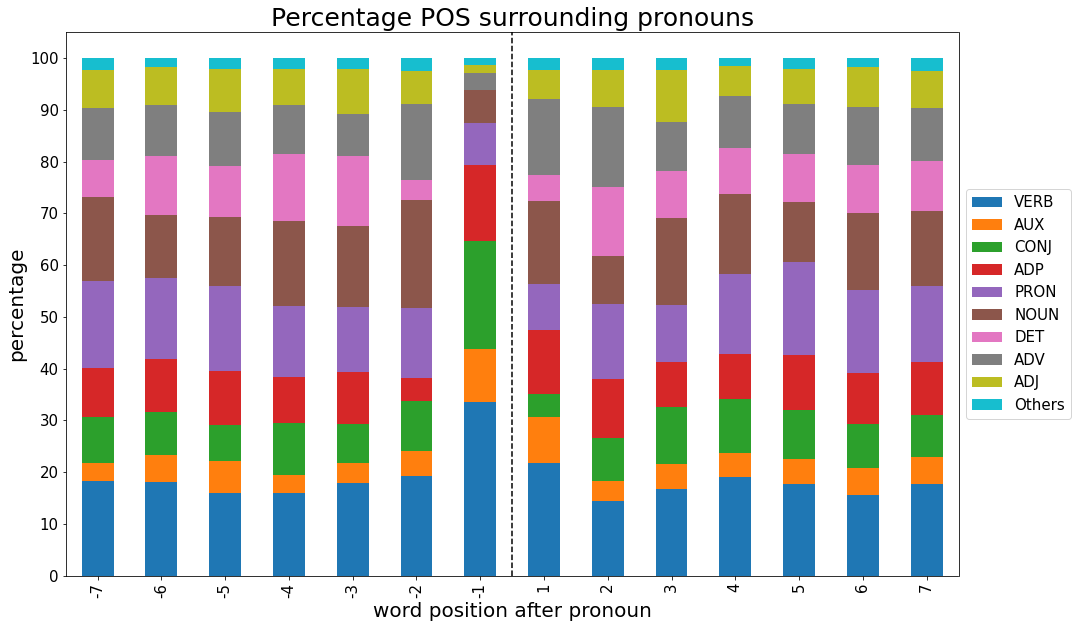

In [397]:
freq_pos_all.plot(
    #x = 'index',
    y = ["VERB",'AUX','CONJ','ADP','PRON','NOUN',"DET","ADV","ADJ","Others"],
    kind = 'bar',
    stacked = True,
    #title = 'Percentage POS surrounding pronouns',
    figsize = (16,10))
plt.title("Percentage POS surrounding pronouns",size = 25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize="15")
plt.xlabel('word position after pronoun',size = 20)
plt.yticks(np.linspace(0,100,11))
plt.ylabel('percentage',size = 20)
plt.axvline(x = 6.5, color = 'black', linestyle= 'dashed', label = 'axvline - full height')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('C:\\Users\\rondin\\Desktop\\Projects\\write-up\\paper1\\Figures\\NEW\\pos_pronoun.pdf')

In [391]:
# referents
labels, words = surrounding_words(code=2)
freq_pos_all = pd.DataFrame(labels, index = [str(x) for x in [-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7]])
freq_pos_all = freq_pos_all[freq_pos_all.columns[:]].div(np.sum(freq_pos_all[freq_pos_all.columns[:]][0:],axis=1),0)*100
freq_pos_all["Others"] = freq_pos_all["PROPN"] + freq_pos_all["INTJ"] + freq_pos_all["NUM"] + freq_pos_all["PUNCT"] + freq_pos_all["X"] + freq_pos_all["nan"]
freq_pos_all["CONJ"] = freq_pos_all["SCONJ"] + freq_pos_all["CCONJ"]
freq_pos_all = freq_pos_all.sort_values(by=['-1'],axis=1,ascending = False)
#freq_pos_all["position"] = pd.Series([-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7])

In [369]:
# the most frequent 20 words and their frequencies
sorted(words.items(), key = lambda x: x[1],reverse = True)

[('de', 308),
 ('het', 279),
 ('en', 266),
 ('zijn', 110),
 ('den', 101),
 ('hij', 100),
 ('een', 95),
 ('in', 76),
 ('je', 74),
 ('dat', 69),
 ('maar', 68),
 ('hem', 68),
 ('er', 64),
 ('was', 62),
 ('te', 57),
 ('zei', 57),
 ('niet', 56),
 ('op', 55),
 ('met', 53),
 ('zij', 50),
 ('De', 44),
 ('ik', 44),
 ('gouden', 44),
 ('die', 41),
 ('haar', 35),
 ('Toen', 34),
 ('om', 33),
 ('van', 33),
 ('voor', 32),
 ('als', 32),
 ('naar', 31),
 ('ging', 31),
 ('Het', 30),
 ('is', 30),
 ('had', 29),
 ('uit', 27),
 ('bij', 26),
 ('dan', 25),
 ('zich', 24),
 ('zoo', 23),
 ('eens', 23),
 ('En', 23),
 ('nog', 22),
 ('nu', 21),
 ('aan', 21),
 ('wat', 21),
 ('zal', 21),
 ('kwam', 20),
 ('door', 19),
 ('werd', 19),
 ('zou', 17),
 ('vogel', 17),
 ('weg', 17),
 ('toen', 17),
 ('liet', 17),
 ('schoone', 16),
 ('mij', 15),
 ('Maar', 15),
 ('wel', 15),
 ('al', 15),
 ('toch', 15),
 ('bosch', 15),
 ('moet', 14),
 ('eendje', 14),
 ('gaf', 14),
 ('Hij', 14),
 ('ook', 14),
 ('groote', 13),
 ('oude', 13),
 ('dac

In [370]:
freq_pos_all

,DET,ADJ,PRON,Others,NUM,NOUN,VERB,PROPN,ADP,nan,X,PUNCT,ADV,SCONJ,INTJ,AUX,CCONJ,CONJ
-7,10.319410,7.371007,18.427518,0.982801,0.000000,13.022113,17.199017,0.0000,7.862408,0.737101,0.0000,0.0000,7.616708,2.457002,0.245700,6.388206,8.353808,10.810811
-6,14.004914,6.142506,14.742015,1.719902,0.491400,13.267813,17.444717,0.0000,8.108108,0.491400,0.0000,0.0000,12.530713,1.719902,0.737101,4.422604,5.896806,7.616708
-5,11.056511,9.828010,15.233415,0.737101,0.000000,16.216216,17.444717,0.0000,8.845209,0.737101,0.0000,0.0000,9.090909,2.948403,0.000000,4.914005,3.685504,6.633907
-4,10.810811,8.108108,17.444717,2.457002,0.491400,16.953317,16.461916,0.0000,8.108108,1.228501,0.0000,0.4914,8.353808,1.228501,0.245700,4.914005,5.159705,6.388206
-3,5.159705,7.616708,12.776413,2.457002,0.245700,15.479115,21.621622,0.0000,8.599509,1.719902,0.0000,0.4914,13.022113,2.211302,0.000000,5.651106,5.405405,7.616708
-2,25.061425,3.931204,6.388206,1.719902,0.245700,6.388206,21.867322,0.0000,14.004914,1.474201,0.0000,0.0000,4.914005,3.439803,0.000000,3.194103,9.090909,12.530713
-1,57.493857,28.009828,10.810811,1.719902,0.982801,0.982801,0.737101,0.4914,0.245700,0.245700,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.176904,2.211302,13.022113,2.211302,0.000000,1.474201,29.484029,0.0000,18.918919,1.474201,0.2457,0.2457,10.073710,2.211302,0.245700,6.633907,9.582310,11.793612
2,12.776413,3.194103,21.130221,0.982801,0.737101,6.633907,18.673219,0.0000,9.582310,0.245700,0.0000,0.0000,11.547912,2.457002,0.000000,5.896806,7.125307,9.582310
3,7.616708,7.125307,20.884521,1.719902,0.491400,18.673219,13.513514,0.0000,7.862408,0.737101,0.0000,0.0000,9.336609,3.439803,0.491400,4.176904,5.651106,9.090909


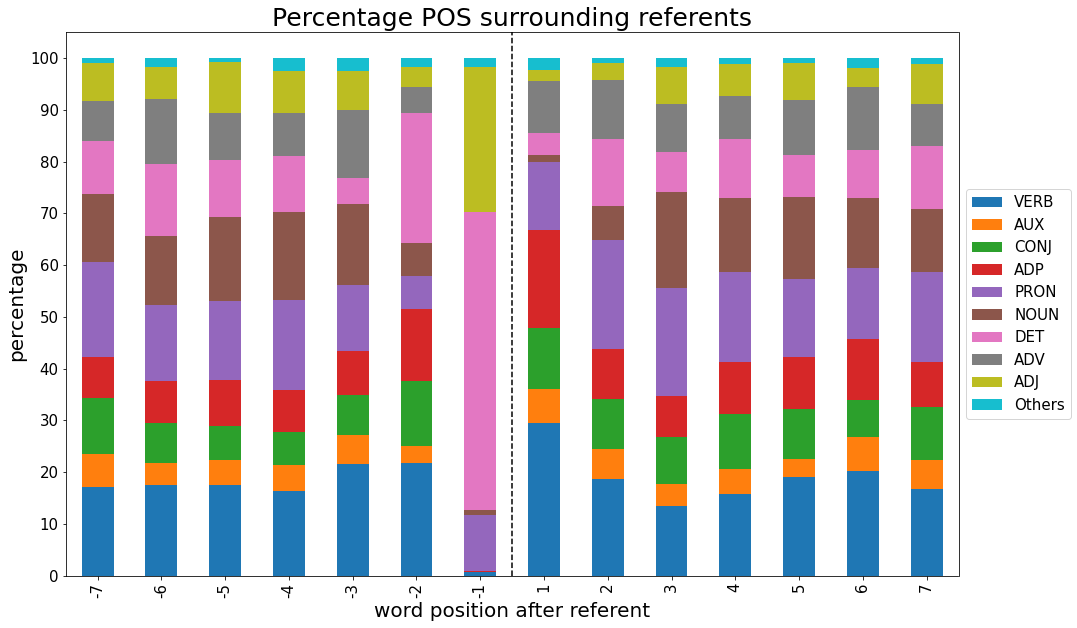

In [394]:
freq_pos_all.plot(
    #x = 'index',
    y = ["VERB",'AUX','CONJ','ADP','PRON','NOUN',"DET","ADV","ADJ","Others"],
    kind = 'bar',
    stacked = True,
    #title = 'Percentage POS surrounding pronouns',
    figsize = (16,10))
plt.title("Percentage POS surrounding referents",size = 25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize="15")
plt.xlabel('word position after referent',size = 20)
plt.yticks(np.linspace(0,100,11))
plt.ylabel('percentage',size = 20)
plt.axvline(x = 6.5, color = 'black', linestyle= 'dashed', label = 'axvline - full height')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('C:\\Users\\rondin\\Desktop\\Projects\\write-up\\paper1\\Figures\\NEW\\pos_referent.pdf')

### Add wordID to each word in the original file and save

In [357]:
dict_annot = dict()

csv_all["wordID"] = pd.Series()

for i in range(len(csv_all)):
    
    print(i)
    # code annotations
    #print(annot)
    annot = csv_all["word"][i]
    if type(annot) is float:
        continue
    annot = annot.replace(" ","")
    annot = annot.lower()
    if annot not in list(dict_annot.keys()):
        dict_annot[annot] = len(list(dict_annot.keys()))+1
        
    #print(dict_annot[annot])
    csv_all["wordID"][i] = dict_annot[annot]

<ipython-input-357-b67315e2ed00>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  csv_all["wordID"] = pd.Series()
<ipython-input-357-b67315e2ed00>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_all["wordID"][i] = dict_annot[annot]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756


4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054


7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332


In [356]:
type(annot)

float

In [358]:
csv_all

,Unnamed: 0,index,word,start,end,duration,file,isPronoun,isPlural,isPreceding,...,pos_new,pos,ord_pos,deprel_new,deprel,feats_new,feats,Comment,stimuli,wordID
0,0,0,Het,0.410000,0.489977,0.079977,A1,0.0,NaN,NaN,...,PRON,PRON,0.0,nsubj,nsubj,Person=3|PronType=Prs,Person=3|PronType=Prs,NaN,NaN,1.0
1,1,1,was,0.490000,0.629977,0.139977,A1,0.0,NaN,NaN,...,AUX,AUX,1.0,cop,cop,Number=Sing|Tense=Past|VerbForm=Fin,Number=Sing|Tense=Past|VerbForm=Fin,NaN,NaN,2.0
2,2,2,heerlijk,0.699977,1.029977,0.330000,A1,0.0,NaN,NaN,...,ADJ,ADJ,2.0,root,root,Degree=Pos,Degree=Pos,NaN,NaN,3.0
3,3,3,buiten,1.030000,1.339977,0.309977,A1,0.0,NaN,NaN,...,ADP,ADP,3.0,obl,obl,_,_,NaN,NaN,4.0
4,4,4,op,1.340000,1.449977,0.109977,A1,0.0,NaN,NaN,...,ADP,ADP,4.0,case,case,_,_,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,8604,867,hun,299.334989,299.424966,0.089977,23G3,1.0,1.0,NaN,...,PRON,PRON,971.0,nmod:poss,nmod:poss,Person=3|Poss=Yes|PronType=Prs,Person=3|Poss=Yes|PronType=Prs,NaN,NaN,209.0
8605,8605,868,geluk,299.424989,300.024966,0.599977,23G3,0.0,NaN,NaN,...,NOUN,NOUN,972.0,obl,obl,Gender=Neut|Number=Sing,Gender=Neut|Number=Sing,NaN,NaN,915.0
8606,8606,869,zoolang,300.404989,300.744966,0.339977,23G3,0.0,NaN,NaN,...,SCONJ,SCONJ,974.0,mark,mark,_,_,NaN,NaN,1221.0
8607,8607,870,zij,300.744989,300.934966,0.189977,23G3,1.0,1.0,NaN,...,PRON,PRON,975.0,nsubj,nsubj,Case=Nom|Person=3|PronType=Prs,Case=Nom|Person=3|PronType=Prs,NaN,NaN,86.0


In [361]:
len(dict_annot.keys())

1688

In [363]:
csv_all.to_csv(baseloc+'\\wordinfo_pos_all_v2.csv')